In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Assuming 'complaints.csv' is in the root of your Google Drive
file_path = '/content/drive/My Drive/complaints.csv'

In [7]:
df_complaints = pd.read_csv(file_path)

/tmp/ipython-input-7-2179142477.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complaints = pd.read_csv(file_path)


In [8]:
# Display basic information about the dataframe
print("DataFrame Info:")
df_complaints.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
me

In [10]:
# Display the first few rows
print("\nFirst 5 rows:")
df_complaints.head()


First 5 rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [13]:
# Display the column names
print("\nColumn Names:")
print(df_complaints.columns)


Column Names:
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [14]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df_complaints.describe())


Summary Statistics:
       Complaint ID
count  9.609797e+06
mean   8.092744e+06
std    3.774842e+06
min    1.000000e+00
25%    5.038016e+06
50%    8.448508e+06
75%    1.129591e+07
max    1.423259e+07


In [15]:
# Display the shape of the dataframe (number of rows and columns)
print("\nDataFrame Shape:")
print(df_complaints.shape)


DataFrame Shape:
(9609797, 18)


In [16]:
# Check for missing values
print("\nMissing Values per Column:")
print(df_complaints.isnull().sum())


Missing Values per Column:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64


In [42]:
# Copy the dataframe to avoid modifying the original one
df = df_complaints.copy()


Distribution of Complaints by Product:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                 

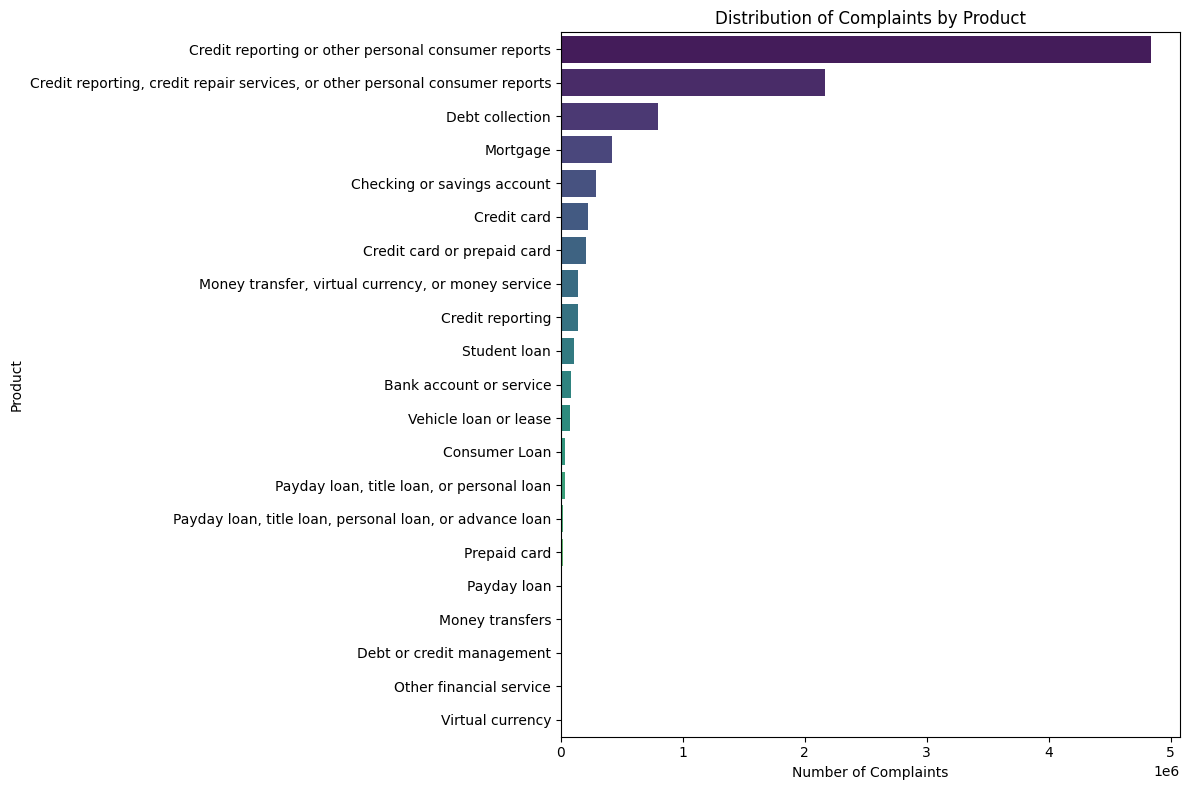

In [26]:
# Analyze the distribution of complaints across different Products.
print("\nDistribution of Complaints by Product:")
product_counts = df['Product'].value_counts()
print(product_counts)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Product', order=product_counts.index, palette='viridis')
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [44]:
# Calculate and visualize the length (word count) of the Consumer complaint narrative.
# Need to handle potential missing values before calculating length
df['Narrative_Length'] = df['Consumer complaint narrative'].str.split().str.len().fillna(0)


Summary Statistics for Narrative Length:
count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: Narrative_Length, dtype: float64


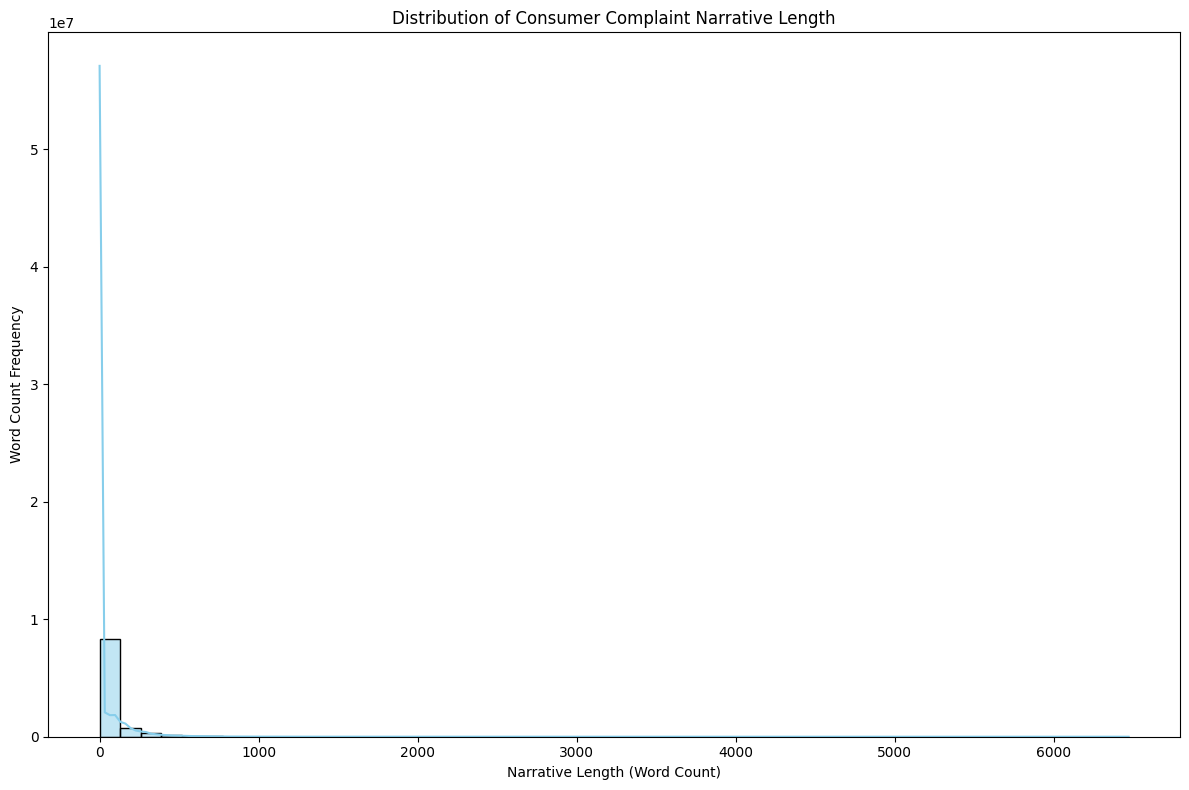

In [45]:
print("\nSummary Statistics for Narrative Length:")
print(df['Narrative_Length'].describe())

plt.figure(figsize=(12, 8))
sns.histplot(df['Narrative_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Consumer Complaint Narrative Length')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Word Count Frequency')
plt.tight_layout()
plt.show()

In [46]:
# Identify the number of complaints with and without narratives.
narrative_present = df['Consumer complaint narrative'].notna().sum()
narrative_missing = df['Consumer complaint narrative'].isna().sum()

print(f"Number of complaints with narrative: {narrative_present}")
print(f"Number of complaints without narrative: {narrative_missing}")

Number of complaints with narrative: 2980756
Number of complaints without narrative: 6629041


In [49]:
# Filter the dataset to meet the project's requirements:
specified_products = ['Credit card', 'Payday loan, title loan, or personal loan',
                      'Buy Now, Pay Later (BNPL)', 'Checking or savings account',
                      'Money transfers', 'Credit card or prepaid card',
                      'Payday loan, title loan, personal loan, or advance loan']
df_filtered = df[df['Product'].isin(specified_products)].copy()
print(f"Shape of dataframe after filtering: {df_filtered.shape}")
print(f"Number of records after filtering: {len(df_filtered)}")
df_filtered.head()

Shape of dataframe after filtering: (776742, 19)
Number of records after filtering: 776742


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Narrative_Length
334,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",TX,75104,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196294,0.0
351,2025-06-07,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,WELLS FARGO & COMPANY,TX,75034,NaN,NaN,Referral,2025-06-09,In progress,Yes,NaN,13984551,0.0
437,2025-06-07,Checking or savings account,Checking account,Closing an account,Company closed your account,NaN,NaN,WELLS FARGO & COMPANY,NV,89115,NaN,NaN,Web,2025-06-07,In progress,Yes,NaN,13956296,0.0
595,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,CA,92553,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196854,0.0
661,2025-06-20,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77346,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196870,0.0


In [50]:
# Remove any records with empty Consumer complaint narrative fields.
df_filtered.dropna(subset=['Consumer complaint narrative'], inplace=True)

print(f"\nShape of dataframe after dropping empty narratives: {df_filtered.shape}")
print(f"Number of records after dropping empty narratives: {len(df_filtered)}")


Shape of dataframe after dropping empty narratives: (357284, 19)
Number of records after dropping empty narratives: 357284


In [52]:
# print some narrative texts
print("\nExamples of Raw Narratives:")
df_filtered['Consumer complaint narrative'].head(2).tolist()


Examples of Raw Narratives:


['A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unauthorized and not me. XXXX XXXX confirmed this was fraudulent and immediately closed the card. However, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by XXXX XXXX that was done by a fraudster.',
 "I made the mistake of using my wellsfargo debit card to depsit funds Into XXXXXXXX ATM machine outside their branch. \n\nI went into the branch and was told they couldn't help and had to phone the customer service for help. I did this and was told I was helped gave all the info for the time terminal id aact # s, XXXX was able to find the transaction and give me this info, he said the dispute would take a few days. \n\nI waited a few days and got a letter stating my dispute was rejected. I went back i

In [51]:
# Clean the text narratives
def clean_narrative(narrative):
  # Lowercasing
  narrative = narrative.lower()
  # Remove common boilerplate (example)
  narrative = re.sub(r'i am writing to file a complaint about ', '', narrative)
  narrative = re.sub(r'i am writing to complain about ', '', narrative)
  narrative = re.sub(r'i am writing to complain ', '', narrative)
  # Remove special characters (keep basic punctuation if needed, or remove all)
  narrative = re.sub(r'[^a-z0-9\s.,]', '', narrative) # Example: keep letters, numbers, spaces, dot, comma
  # Remove extra whitespace
  narrative = re.sub(r'\s+', ' ', narrative).strip()
  return narrative

df_filtered['Cleaned_Narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_narrative)

In [53]:
# print some narrative texts
print("\nExamples of Cleaned Narratives:")
df_filtered['Cleaned_Narrative'].head(2).tolist()


Examples of Cleaned Narratives:


['a xxxx xxxx card was opened under my name by a fraudster. i received a notice from xxxx that an account was just opened under my name. i reached out to xxxx xxxx to state that this activity was unauthorized and not me. xxxx xxxx confirmed this was fraudulent and immediately closed the card. however, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by xxxx xxxx that was done by a fraudster.',
 'i made the mistake of using my wellsfargo debit card to depsit funds into xxxxxxxx atm machine outside their branch. i went into the branch and was told they couldnt help and had to phone the customer service for help. i did this and was told i was helped gave all the info for the time terminal id aact s, xxxx was able to find the transaction and give me this info, he said the dispute would take a few days. i waited a few days and got a letter stating my dispute was rejected. i went back into xxxx and

In [54]:
# Save the cleaned and filtered dataset
output_path = '/content/drive/My Drive/filtered_complaints.csv'
df_filtered.to_csv(output_path, index=False)

print(f"\nCleaned and filtered dataset saved to: {output_path}")


Cleaned and filtered dataset saved to: /content/drive/My Drive/filtered_complaints.csv


## Exploratory Data Analysis Summary

Based on the initial exploratory data analysis of the complaints data, several key findings emerged:

The dataset contains a large number of complaints, with **9,609,797 records** and 18 columns. The majority of columns are of `object` dtype, indicating textual or categorical data, except for 'Complaint ID', which is an integer. There are significant numbers of missing values in several columns, most notably in 'Tags' (**8,981,029 missing**), 'Consumer disputed?' (**8,841,498 missing**), and 'Consumer complaint narrative' (**6,629,041 missing**). The 'Consumer complaint narrative' column is particularly sparse, with a large proportion of records missing this information.

Analyzing the distribution of complaints by 'Product' revealed that 'Credit reporting or other personal consumer reports' and 'Credit reporting, credit repair services, or other personal consumer reports' account for the vast majority of complaints. The analysis of the 'Consumer complaint narrative' length showed a wide range of word counts, although a significant number of complaints have no narrative provided. After filtering the dataset to include only specified product types, the dataframe contains **776,742 records**. After removing records without narratives, the remaining dataset is considerably smaller with **357,284 records**, but contains the necessary information for further analysis. The cleaning process applied to the narratives involved lowercasing, removing boilerplate text, and handling special characters, preparing the text data for subsequent tasks like sentiment analysis or topic modeling.